# Имитация подбора пароля с помощью генетического алгоритма

Предположим что длинна пароля 20 символов. Используется 500 символов ASCII, правая сторона пароля задается пробелом



In [242]:
import random
import numpy
import matplotlib.pyplot as plt

## Задаём пароль и проверяем корректность

In [459]:
l = 20 # длинна пароля

# password = input('Введите пароль: ')
password = 'asd45fyjae'

password = [x for x in password]
if len(password) <l:
    [password.append(' ') for x in range(l-len(password))]
    
print('Password: ', password)

Password:  ['a', 's', 'd', '4', '5', 'f', 'y', 'j', 'a', 'e', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


In [467]:
# list_of_values = [i for i in values]
list_of_values = [chr(i) for i in range(20, 512)]
list_of_values.append(' ')
# bot = print(random.sample(list_of_values,l))
print('Possible values of password: ', list_of_values)

for i in password:
    if i not in list_of_values:
        print('ERROR')

Possible values of password:  ['\x14', '\x15', '\x16', '\x17', '\x18', '\x19', '\x1a', '\x1b', '\x1c', '\x1d', '\x1e', '\x1f', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x80', '\x81', '\x82', '\x83', '\x84', '\x85', '\x86', '\x87', '\x88', '\x89', '\x8a', '\x8b', '\x8c', '\x8d', '\x8e', '\x8f', '\x90', '\x91', '\x92', '\x93', '\x94', '\x95', '\x96', '\x97', '\x98', '\x99', '\x9a', '\x9b', '\x9c', '\x9d', '\x9e', '\x9f', '\xa0', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '\xad', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹

## Giperparams

In [469]:
N = 100        # Общее число ботов
NSURV = 20     # Количество выживших (столько лучших переходит в новую популяцию)
nnew = N-NSURV # Количество новых (столько новых ботов создается)
EPOCHS = 2000   # количество эпох
MUT = 0.5      # коэфициент мутаций
FREQ_MUT_CHANGE = int(EPOCHS/5 )# чатота уменьшения мутации


eph_change_mut = [x for x in range(FREQ_MUT_CHANGE, EPOCHS, FREQ_MUT_CHANGE)] # эпохи смены коэфициента мутации
new_mut = [MUT/x for x in range(1, int(EPOCHS/FREQ_MUT_CHANGE))]         # новый коэфициент мутаци



## Fit and result

400 0.3333333333333333
800 0.2222222222222222
1200 0.14814814814814814
Выполненно на эпохе:  1214


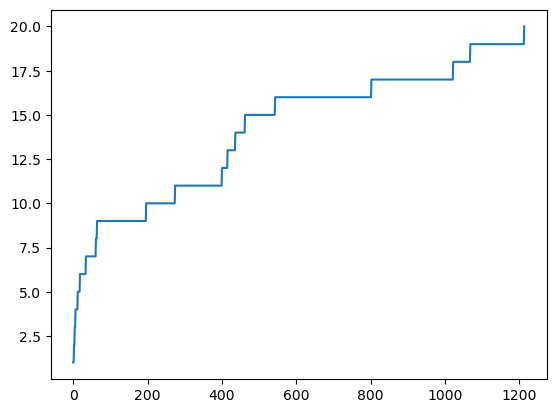

In [476]:
mut = MUT
# trains = train.shape[0] # Количество вагонов поезда
popul = np.ones([N, l], dtype=str)     # Двумерный массив популяции, размерностью [n, l].
result = np.zeros(N)
# result = np.zeros(N)
plot_values = [] # значения для графика по среднему значению
m = []
# plotminval = []  # значения для графика по минимальному значению

# Create first generation
for i in range(N):
#     print('Da')
    popul[i,] = random.sample(list_of_values, l)
# [popul[i] = random.sample(list_of_values, l) for i in range(N)]
next_popul = popul
for e in range(1, EPOCHS):
    
    if e%FREQ_MUT_CHANGE== 0:
        
        mut/=1.5
        print(e, mut)
    result = [int(sum(next_popul[i] == password)) for i in range(N)]    # получаем результаты 
    m.append(mut*100)
    plot_values.append(max(result))
    if max(result) == l:
        print('Выполненно на эпохе: ', e)
        
        break
    ind = np.argsort(result) # получаем лучшие индексы
    
    next_popul = next_popul[ind][-NSURV:] # популяция с лучшими результатами
    for i in range (N - NSURV): # add next population
        first_parent = next_popul[random.randint(0, NSURV - 1)]
        second_parent = next_popul[random.randint(0, NSURV - 1)]
        
        # добавляем скрещивание 
        new_bot = [first_parent[i] if random.random()>0.5 else second_parent[i] for i in range(l)]
        # добавляем мутацию
        new_bot = np.array([new_bot[i] if random.random()>mut else random.choice(list_of_values) for i in range(l)]).reshape((1,l))


        
        next_popul = np.concatenate((next_popul, new_bot), axis = 0)
    
    

plt.plot(plot_values)
# plt.plot(m)

In [477]:
popul.shape

(100, 20)

# Решение нелинейного уравнения



$f(xy)=7x^2 - y + \frac{y^3 - x^2}{3x} + y^2 - 21x$


## giperparams

In [557]:
N = 100        # Общее число ботов
NSURV = 20     # Количество выживших (столько лучших переходит в новую популяцию)
nnew = N-NSURV # Количество новых (столько новых ботов создается)
EPOCHS = 50000   # количество эпох
er = int(EPOCHS/10)
# BIG_EPOCHS
MUT = 1      # коэфициент мутаций
FREQ_MUT_CHANGE = int(er/25 )# чатота уменьшения мутации
l=2 # кол-во координат

In [556]:
popul = np.random.rand(N, l)/np.random.rand(N, l)     # Двумерный массив популяции, размерностью [n, l].
result = np.array([my_evaluate(x,y) for x,y in popul])

ind = np.argsort(result) # получаем лучшие индексы
print(popul.shape, result.shape, ind)

next_popul = popul[ind][:NSURV] # популяция с лучшими результатами

(100, 2) (100,) [48 15 64 60 19 33 94 77 57 82 86 56 75 58 74 35 88 71 83 39 63 70 97 76
 96  0 41 93 79 69 51 72 91 22  6 46 12 20 26 34 59  5 25 61 55 38 37  3
 67 32 65 52 54 49 84 68 95 30 85 66 31 21 99 50 24 17  7 98 40 14 29  1
 23 36  4 27 43  9 53 28 11 78 92 87 90 89 62 45 13  8 81 80 47 16 42 73
  2 44 10 18]


## Fit and result.
решение достаточно примитивное, но пока оставим

Найденно решение выполненно на эпохе: 1306 решение: [0.09932712 1.92510551] результат: 7.0866535413216525e-06
Найденно решение выполненно на эпохе: 1607 решение: [0.00946621 1.16567825] результат: 3.802139670894267e-05
Найденно решение выполненно на эпохе: 2674 решение: [0.13111684 2.07843419] результат: 6.3298777006615126e-06
Найденно решение выполненно на эпохе: 5548 решение: [-0.00396919  0.90925152] результат: 4.442989124953112e-05
Найденно решение выполненно на эпохе: 15300 решение: [1.2099326  2.92682779] результат: 8.586937264354333e-05
Найденно решение выполненно на эпохе: 15829 решение: [0.15508748 2.17551522] результат: 8.2266692339239e-05
Найденно решение выполненно на эпохе: 17330 решение: [3.63174658 0.10594572] результат: 4.823974225587335e-05
Найденно решение выполненно на эпохе: 20546 решение: [0.06761117 1.73314216] результат: 2.8296199808597322e-05
Найденно решение выполненно на эпохе: 21186 решение: [0.71144466 2.92060161] результат: 3.431018016541998e-05
Найденно ре

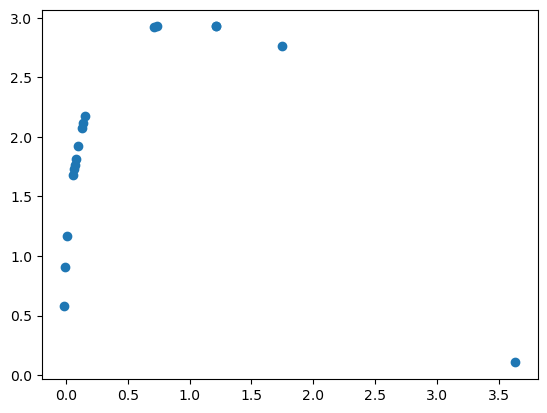

In [559]:
mut = MUT
plot_values = []
# initialization
def my_evaluate(x,y):
    answer = np.abs(7*x**2-y+(y**3-x**2)/3*x+y**2-21*x)
    return answer

popul = np.random.rand(N, l)/np.random.rand(N, l)     # Двумерный массив популяции, размерностью [n, l].
result = np.array([my_evaluate(x,y) for x,y in popul])

answers = []
for e in range(1, EPOCHS):
    
    if e%FREQ_MUT_CHANGE== 0:
        
        mut/=1.5
#         print('Эпока: {}, коэффициент мутации{}'.format(e, mut))
    
    m.append(mut*100)
    plot_values.append(min(result))
    
    if e%er== 0:
        mut = MUT
        popul = np.random.rand(NSURV, l)/np.random.rand(NSURV, l)     # Двумерный массив популяции, размерностью [n, l].
        result = np.array([my_evaluate(x,y) for x,y in popul])    
    
    result = np.array([my_evaluate(x,y) for x,y in popul])
    ind = np.argsort(result) # получаем лучшие индексы
    popul = popul[ind][:NSURV] # популяция с лучшими результатами
    
    ###### add выход из цикла
    if min(result) < 0.0001:
        
        print('Найденно решение выполненно на эпохе:', e, 'решение:', popul[0], 'результат:', my_evaluate(popul[0,0], popul[0,1]))
        answers.append(list(popul[0]))
        mut = MUT
        popul = np.random.rand(NSURV, l)/np.random.rand(NSURV, l)     # Двумерный массив популяции, размерностью [n, l].
        result = np.array([my_evaluate(x,y) for x,y in popul])
#         break
    #########
    
    for i in range (N - NSURV): # add next population
        first_parent = next_popul[random.randint(0, NSURV - 1)]
        second_parent = next_popul[random.randint(0, NSURV - 1)]
        
        new_bot = [0., 0.]
        
        # добавляем скрещивание 
        
        new_bot = [first_parent[i] if random.random()>0.5 else second_parent[i] for i in range(l)]
        # добавляем мутацию
        new_bot = np.array([new_bot[i] if random.random()>mut else new_bot[i]*random.random()/random.random()+0.5-random.random() for i in range(l)]).reshape((1,l))
        
        popul = np.concatenate((popul, new_bot), axis = 0)
    
    
# plt.plot(plot_values)
plt.scatter(np.array(answers)[:, 0], np.array(answers)[:, 1])
# popul.shape, result.shape

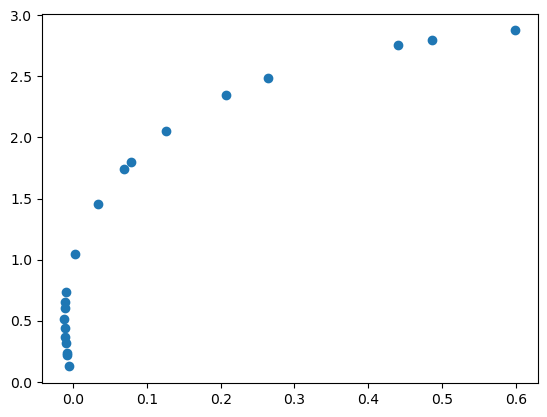

In [554]:
# answers
np.array(answers)[:, 1]
plt.scatter(np.array(answers)[:, 0], np.array(answers)[:, 1])

In [547]:
np.array(answers)[:, 1]

array([1.48249153, 0.0622149 , 0.53986706, 0.11283212, 0.53980891,
       1.44255734, 1.04303505])

In [ ]:
next_popul = popul
for e in range(1, EPOCHS):
    
    if e%FREQ_MUT_CHANGE== 0:
        
        mut/=1.5
        print(e, mut)
    result = [int(sum(next_popul[i] == password)) for i in range(N)]    # получаем результаты 
    m.append(mut*100)
    plot_values.append(max(result))
    if max(result) == l:
        print('Выполненно на эпохе: ', e)
        
        break
    ind = np.argsort(result) # получаем лучшие индексы
    
    next_popul = next_popul[ind][-NSURV:] # популяция с лучшими результатами
    for i in range (N - NSURV): # add next population
        first_parent = next_popul[random.randint(0, NSURV - 1)]
        second_parent = next_popul[random.randint(0, NSURV - 1)]
        
        # добавляем скрещивание 
        new_bot = [first_parent[i] if random.random()>0.5 else second_parent[i] for i in range(l)]
        # добавляем мутацию
        new_bot = np.array([new_bot[i] if random.random()>mut else random.choice(list_of_values) for i in range(l)]).reshape((1,l))


        
        next_popul = np.concatenate((next_popul, new_bot), axis = 0)
    
    

plt.plot(plot_values)

In [480]:
for e in range(1, EPOCHS):
    
    if e%FREQ_MUT_CHANGE== 0:
        
        mut/=1.5
        print(e, mut)
    result = [int(sum(next_popul[i] == password)) for i in range(N)]    # получаем результаты 
    m.append(mut*100)
    plot_values.append(max(result))
    if max(result) == l:
        print('Выполненно на эпохе: ', e)
        
        break
    ind = np.argsort(result) # получаем лучшие индексы
    
    next_popul = next_popul[ind][-NSURV:] # популяция с лучшими результатами
    for i in range (N - NSURV): # add next population
        first_parent = next_popul[random.randint(0, NSURV - 1)]
        second_parent = next_popul[random.randint(0, NSURV - 1)]
        
        # добавляем скрещивание 
        new_bot = [first_parent[i] if random.random()>0.5 else second_parent[i] for i in range(l)]
        # добавляем мутацию
        new_bot = np.array([new_bot[i] if random.random()>mut else random.choice(list_of_values) for i in range(l)]).reshape((1,l))


        
        next_popul = np.concatenate((next_popul, new_bot), axis = 0)
    
    

plt.plot(plot_values)


(100, 2)